In [294]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
import numpy as np

In [295]:
#Зчитуємо файл і виводимо перші 5 рядків
df = pd.read_csv('museum_visitors.csv', delimiter=',', encoding='latin1')  
df.head(5)

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
0,2014-01-01,24778,4486,1581,6602
1,2014-02-01,18976,4172,1785,5029
2,2014-03-01,25231,7082,3229,8129
3,2014-04-01,26989,6756,2129,2824
4,2014-05-01,36883,10858,3676,10694


In [296]:
#3. Провести попередній аналіз даних (визначити розмір датасету, тип даних, кількість пропусків).
# Визначення розміру датасету
print(f"Розмір датасету: {df.shape}")

Розмір датасету: (59, 5)


In [297]:
# Визначення типів даних
print(df.dtypes)

Date                                    object
Avila Adobe                              int64
Firehouse Museum                         int64
Chinese American Museum                  int64
America Tropical Interpretive Center     int64
dtype: object


In [298]:
# Підрахунок пропусків
missing_values = df.isnull().sum()
print("Кількість пропусків у кожному стовпці:")
print(missing_values)

Кількість пропусків у кожному стовпці:
Date                                    0
Avila Adobe                             0
Firehouse Museum                        0
Chinese American Museum                 0
America Tropical Interpretive Center    0
dtype: int64


In [299]:
#4. Перевірити наявність дублікатів. Якщо є, видалити їх і вивести розмір таблиці (без дублікатів).
# Перевірка наявності дублікатів
duplicates = df.duplicated()

# Видалення дублікатів і створення нового датасету без них
df_no_duplicates = df[~duplicates]

# Виведення розміру нової таблиці (без дублікатів)
print(f"Розмір таблиці без дублікатів: {df_no_duplicates.shape}")

Розмір таблиці без дублікатів: (59, 5)


In [300]:
#5. Про які роки містить інформацію датасет.

years = df['Date'].unique()

# Виведіть унікальні роки
print("Роки, про які містить інформацію датасет:")
for year in years:
    print(year)

Роки, про які містить інформацію датасет:
2014-01-01
2014-02-01
2014-03-01
2014-04-01
2014-05-01
2014-06-01
2014-07-01
2014-08-01
2014-09-01
2014-10-01
2014-11-01
2014-12-01
2015-01-01
2015-02-01
2015-03-01
2015-04-01
2015-05-01
2015-06-01
2015-07-01
2015-08-01
2015-09-01
2015-10-01
2015-11-01
2015-12-01
2016-01-01
2016-02-01
2016-03-01
2016-04-01
2016-05-01
2016-06-01
2016-07-01
2016-08-01
2016-09-01
2016-10-01
2016-11-01
2016-12-01
2017-01-01
2017-02-01
2017-03-01
2017-04-01
2017-05-01
2017-06-01
2017-07-01
2017-08-01
2017-09-01
2017-10-01
2017-11-01
2017-12-01
2018-01-01
2018-02-01
2018-03-01
2018-04-01
2018-05-01
2018-06-01
2018-07-01
2018-08-01
2018-09-01
2018-10-01
2018-11-01


In [301]:
#6. 6.	Змінити назви столбців. Замінити великі букви на маленьки, пробіли на підкреслення
#(date, avila_adobe, firehouse_museum, chinese_american_museum, america_tropical_interpretive_center).

column_changing = {
    'Date': 'date',
    'Avila Adobe': 'avila_adobe',
    'Firehouse Museum': 'firehouse_museum',
    'Chinese American Museum': 'chinese_american_museum',
    'America Tropical Interpretive Center': 'america_tropical_interpretive_center'
}

# Змініть назви стовпців за допомогою методу rename()
df.rename(columns=column_changing, inplace=True)

# Виведіть оновлений датасет
print(df)

          date  avila_adobe  firehouse_museum  chinese_american_museum  \
0   2014-01-01        24778              4486                     1581   
1   2014-02-01        18976              4172                     1785   
2   2014-03-01        25231              7082                     3229   
3   2014-04-01        26989              6756                     2129   
4   2014-05-01        36883             10858                     3676   
5   2014-06-01        29487              5751                     2121   
6   2014-07-01        32378              5406                     2239   
7   2014-08-01        37680              8619                     1769   
8   2014-09-01        28473             61192                     1073   
9   2014-10-01        27995              6488                     1979   
10  2014-11-01        25691              4189                     2404   
11  2014-12-01        18754              4339                     1319   
12  2015-01-01        20438           

In [302]:
#7. Обчислити середню кількість відвідувачів для кожного музею протягом всього періоду.

columns_to_average = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']

# Обчисліть середню кількість відвідувачів для кожного музею
average_visitors = df[columns_to_average].mean(axis=1)

# Додайте середню кількість відвідувачів як новий стовпець до датасету
df['average_visitors'] = average_visitors

# Виведіть результат, включаючи середню кількість відвідувачів для кожного музею
print(df[['avila_adobe', 'average_visitors']])

    avila_adobe  average_visitors
0         24778           9361.75
1         18976           7490.50
2         25231          10917.75
3         26989           9674.50
4         36883          15527.75
5         29487          12098.75
6         32378          13378.25
7         37680          14301.75
8         28473          24099.75
9         27995          10954.50
10        25691          10514.25
11        18754           7899.00
12        20438           8092.25
13        15578           6696.25
14        21297           9726.75
15        26670          10995.25
16        34383          16031.75
17        30569          12398.00
18        41242          15370.50
19        30700          12648.50
20        20967           8679.75
21        29764          13351.75
22        24483          10214.50
23        21426           8492.50
24        19659           8193.25
25        17378           7638.75
26        20322          11084.25
27        24521           9907.00
28        3172

In [303]:
# Виведіть результат, включаючи середню кількість відвідувачів для кожного музею
print(df[['firehouse_museum', 'average_visitors']])

    firehouse_museum  average_visitors
0               4486           9361.75
1               4172           7490.50
2               7082          10917.75
3               6756           9674.50
4              10858          15527.75
5               5751          12098.75
6               5406          13378.25
7               8619          14301.75
8              61192          24099.75
9               6488          10954.50
10              4189          10514.25
11              4339           7899.00
12              3858           8092.25
13              3742           6696.25
14              5390           9726.75
15              7000          10995.25
16             12528          16031.75
17              5377          12398.00
18              6111          15370.50
19              5383          12648.50
20              5746           8679.75
21              8882          13351.75
22              6848          10214.50
23              4502           8492.50
24              4377     

In [304]:
# Виведіть результат, включаючи середню кількість відвідувачів для кожного музею
print(df[['chinese_american_museum', 'average_visitors']])

    chinese_american_museum  average_visitors
0                      1581           9361.75
1                      1785           7490.50
2                      3229          10917.75
3                      2129           9674.50
4                      3676          15527.75
5                      2121          12098.75
6                      2239          13378.25
7                      1769          14301.75
8                      1073          24099.75
9                      1979          10954.50
10                     2404          10514.25
11                     1319           7899.00
12                     1823           8092.25
13                     1558           6696.25
14                     2336           9726.75
15                     3057          10995.25
16                     4009          16031.75
17                     2544          12398.00
18                     3057          15370.50
19                     2415          12648.50
20                     1398       

In [305]:
# Виведіть результат, включаючи середню кількість відвідувачів для кожного музею
print(df[['america_tropical_interpretive_center', 'average_visitors']])

    america_tropical_interpretive_center  average_visitors
0                                   6602           9361.75
1                                   5029           7490.50
2                                   8129          10917.75
3                                   2824           9674.50
4                                  10694          15527.75
5                                  11036          12098.75
6                                  13490          13378.25
7                                   9139          14301.75
8                                   5661          24099.75
9                                   7356          10954.50
10                                  9773          10514.25
11                                  7184           7899.00
12                                  6250           8092.25
13                                  5907           6696.25
14                                  9884           9726.75
15                                  7254          10995.

In [306]:
#8. Знайти мінімальну та максимальну кількість відвідувачів для кожного музею за 2018 рік

df_2018 = df[df['date'].str.contains('2018')]

# Вибір стовпців з кількістю відвідувачів у кожному музею
museum_columns = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']

# Знаходження мінімальної та максимальної кількості відвідувачів для кожного музею
min_visitors = df_2018[museum_columns].min()
max_visitors = df_2018[museum_columns].max()

print("Мінімальна кількість відвідувачів за 2018 рік:")
print(min_visitors)

print("\nМаксимальна кількість відвідувачів за 2018 рік:")
print(max_visitors)

Мінімальна кількість відвідувачів за 2018 рік:
avila_adobe                             14718
firehouse_museum                         3306
chinese_american_museum                  2146
america_tropical_interpretive_center     3180
dtype: int64

Максимальна кількість відвідувачів за 2018 рік:
avila_adobe                             25173
firehouse_museum                         8013
chinese_american_museum                  4960
america_tropical_interpretive_center     5837
dtype: int64


In [307]:
#9. Визначити місяці з найвищою і найнижчою загальною кількістю відвідувачів серед усіх музеїв для 2015 року.
#Вивести назви місяців (не цифри).

df_2015 = df[df['date'].str.contains('2015')]

# Розділіть дату на місяці
df_2015['Month'] = pd.to_datetime(df_2015['date']).dt.month_name()

# Групування даних за місяцями та обчислення загальної кількості відвідувачів
monthly_visitors = df_2015.groupby('Month').agg({'avila_adobe': 'sum', 'firehouse_museum': 'sum', 'chinese_american_museum': 'sum', 'america_tropical_interpretive_center': 'sum'}).sum(axis=1)

# Знайдіть місяць з найвищою та найнижчою загальною кількістю відвідувачів
highest_month = monthly_visitors.idxmax()
lowest_month = monthly_visitors.idxmin()

# Виведіть назви місяців (не цифри)
print(f"Місяць з найвищою загальною кількістю відвідувачів: {highest_month}")
print(f"Місяць з найнижчою загальною кількістю відвідувачів: {lowest_month}")

Місяць з найвищою загальною кількістю відвідувачів: May
Місяць з найнижчою загальною кількістю відвідувачів: February


C:\Users\Admin\AppData\Local\Temp\ipykernel_9024\967115929.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015['Month'] = pd.to_datetime(df_2015['date']).dt.month_name()


In [308]:
#10. Порівняти кількість відвідувачів музею "Avila Adobe" у літні і зимові місяці 2018 року

df_2018 = df[df['date'].str.contains('2018')]

df_2018['Month'] = pd.to_datetime(df_2018['date']).dt.month_name()

# Визначення літніх та зимових місяців (наприклад, літо - червень, липень, серпень; зима - грудень, січень, лютий)
summer_months = ['June', 'July', 'August']
winter_months = ['December', 'January', 'February']

# Фільтрація даних для літніх і зимових місяців
summer_data = df_2018[df_2018['Month'].isin(summer_months)]
winter_data = df_2018[df_2018['Month'].isin(winter_months)]

# Вибір даних для музею "Avila Adobe"
avila_adobe_summer = summer_data['avila_adobe'].sum()
avila_adobe_winter = winter_data['avila_adobe'].sum()

# Виведення результатів
print(f"Кількість відвідувачів музею 'Avila Adobe' в літні місяці 2018 року: {avila_adobe_summer}")
print(f"Кількість відвідувачів музею 'Avila Adobe' в зимові місяці 2018 року: {avila_adobe_winter}")

Кількість відвідувачів музею 'Avila Adobe' в літні місяці 2018 року: 66122
Кількість відвідувачів музею 'Avila Adobe' в зимові місяці 2018 року: 30983


C:\Users\Admin\AppData\Local\Temp\ipykernel_9024\4137978608.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['Month'] = pd.to_datetime(df_2018['date']).dt.month_name()


In [309]:
#11. Знайти кореляцію між кількістю відвідувачів в кожному з музеїв  та датами у 2016 році

df_2016 = df[df['date'].str.contains('2016')]

# Вибір стовпців з кількістю відвідувачів у кожному музеї
museum_columns = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']
museum_data = df_2016[museum_columns]

# Використання кореляції Пірсона
correlation = museum_data.corr()

# Виведення матриці кореляції
print("Матриця кореляції:")
print(correlation)

Матриця кореляції:
                                      avila_adobe  firehouse_museum  \
avila_adobe                              1.000000          0.737200   
firehouse_museum                         0.737200          1.000000   
chinese_american_museum                  0.089054          0.553935   
america_tropical_interpretive_center     0.436561          0.247389   

                                      chinese_american_museum  \
avila_adobe                                          0.089054   
firehouse_museum                                     0.553935   
chinese_american_museum                              1.000000   
america_tropical_interpretive_center                 0.443800   

                                      america_tropical_interpretive_center  
avila_adobe                                                       0.436561  
firehouse_museum                                                  0.247389  
chinese_american_museum                                           0.

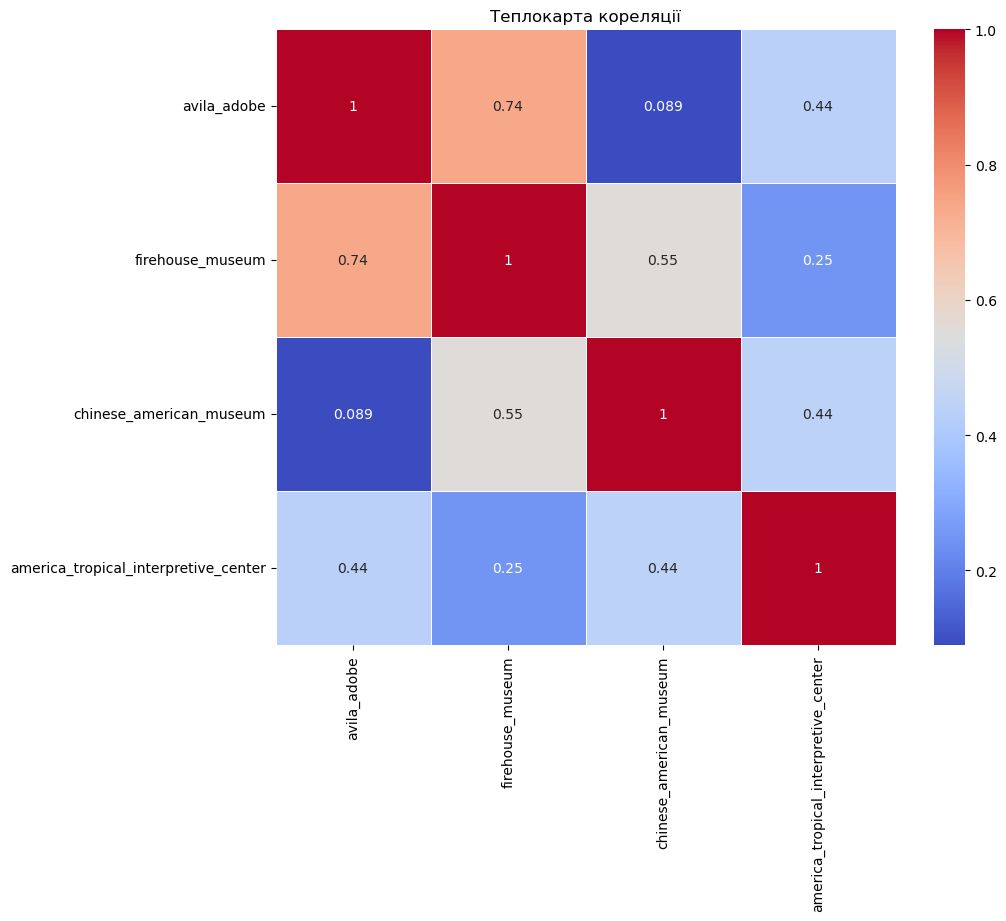

In [310]:
#12. Будуємо теплокарту кореляції для попереднього завдання.

df_2016 = df[df['date'].str.contains('2016')]

# Вибір стовпців з кількістю відвідувачів у кожному музеї
museum_columns = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']
museum_data = df_2016[museum_columns]

# Розрахунок кореляції Пірсона
correlation = museum_data.corr()

# Побудова теплокарти кореляції
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Теплокарта кореляції')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9024\2525451834.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  museum_data['date'] = pd.to_datetime(df_2017['date'])


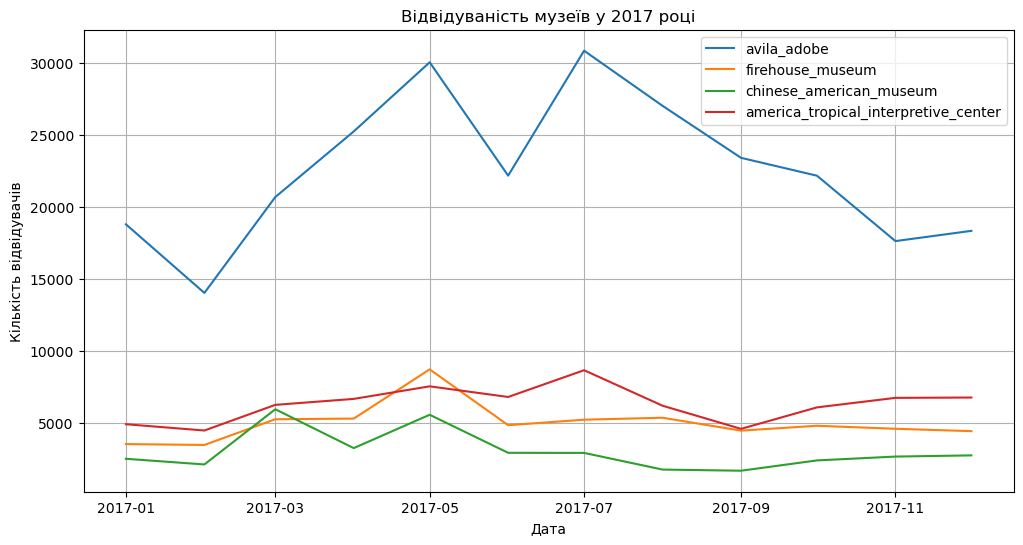

In [311]:
#Будуємо графік ліній для кожного музею, показуючи їхню відвідуваність протягом 2017 року.

df_2017 = df[df['date'].str.contains('2017')]

# Вибір стовпців з кількістю відвідувачів у кожному музеї
museum_columns = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']
museum_data = df_2017[museum_columns]

# Додавання стовпця "date" в якості індексу (дати)
museum_data['date'] = pd.to_datetime(df_2017['date'])
museum_data.set_index('date', inplace=True)

# Побудова графіка ліній для кожного музею
plt.figure(figsize=(12, 6))
for museum in museum_columns:
    plt.plot(museum_data.index, museum_data[museum], label=museum)

plt.title('Відвідуваність музеїв у 2017 році')
plt.xlabel('Дата')
plt.ylabel('Кількість відвідувачів')
plt.legend()
plt.grid(True)
plt.show()

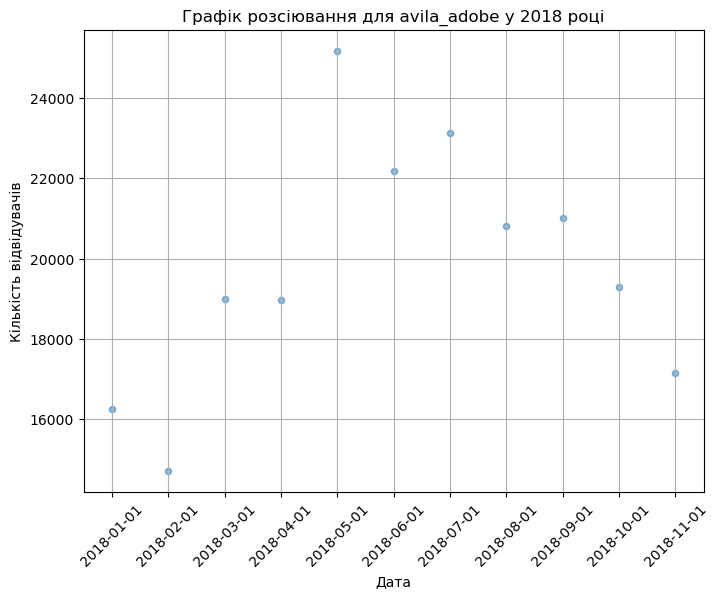

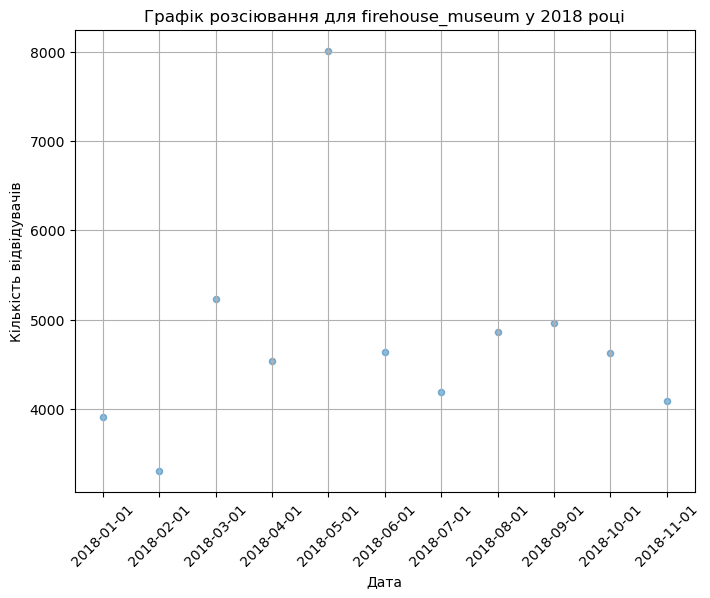

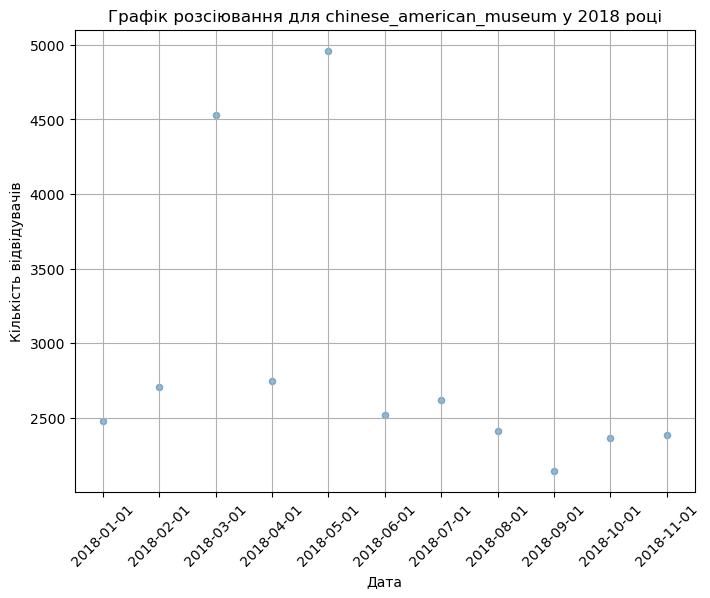

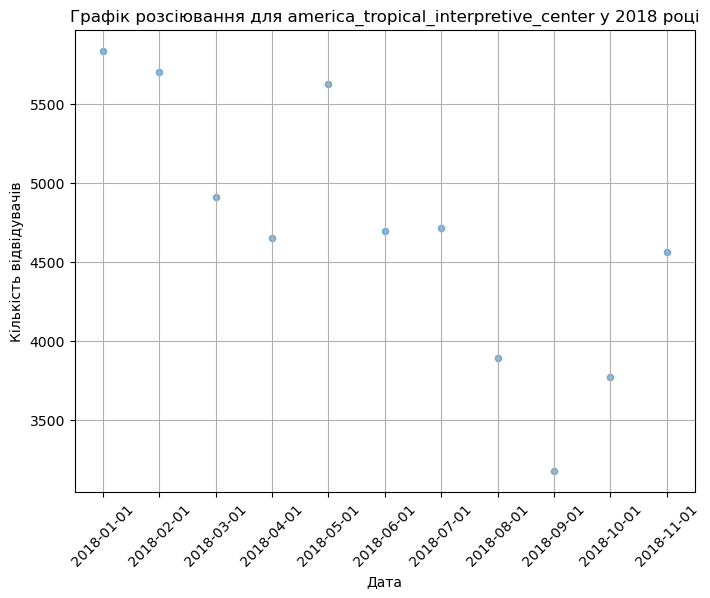

In [312]:
# Будуємо графіки розсіювання для кожного музею за 2018 рік

df_2018 = df[df['date'].str.contains('2018')]

# Вибір стовпців з кількістю відвідувачів у кожному музеї
museum_columns = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']

# Побудова графіків розсіювання для кожного музею
for museum in museum_columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(data_2018['date'], data_2018[museum], s=20, alpha=0.5)
    plt.title(f'Графік розсіювання для {museum} у 2018 році')
    plt.xlabel('Дата')
    plt.ylabel('Кількість відвідувачів')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

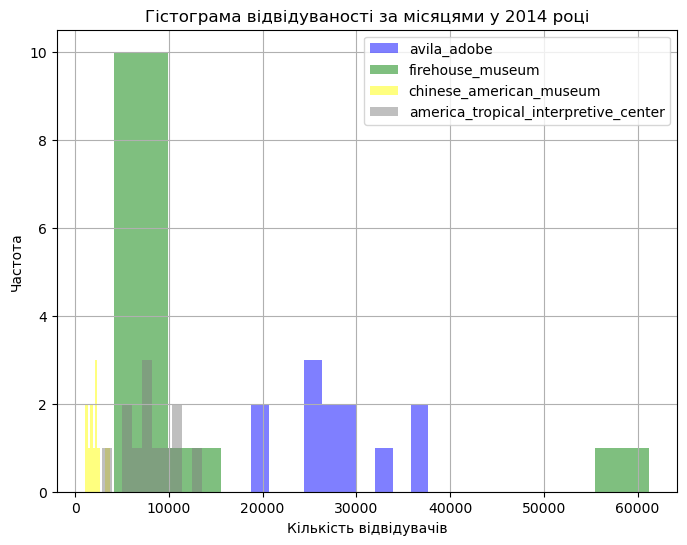

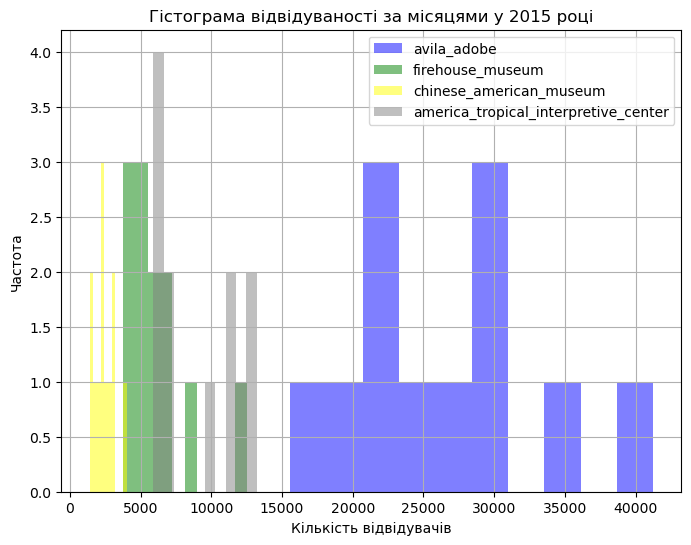

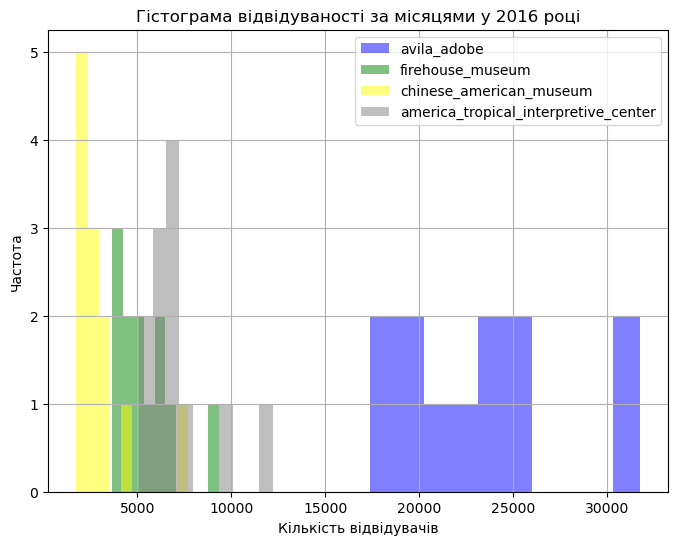

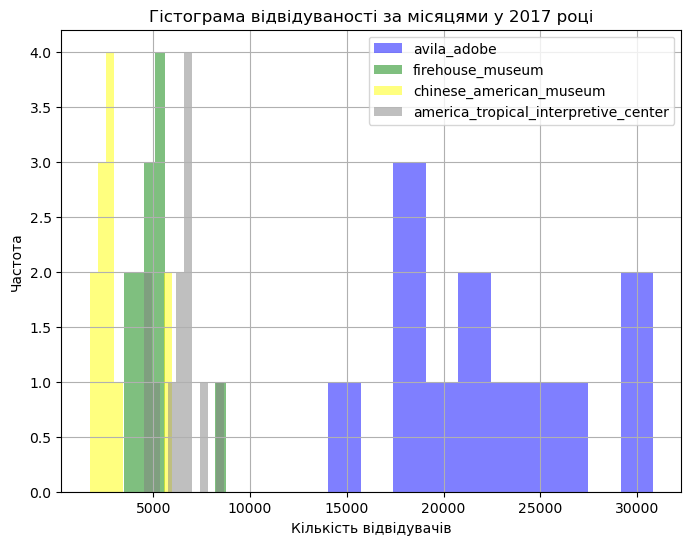

In [313]:
# 15. Будуємо гістограму відвідуваності за місяцями кожного музею. Вивести 4 графіки: за 2014, 2015, 2016, 2017 роки. 
#Графіки розташовані два зверху, два знизу, колір першого графіка - синій, другого зелений, третього жовтий, четвертого сірий.

df_2014 = df[df['date'].str.contains('2014')]
df_2015 = df[df['date'].str.contains('2015')]
df_2016 = df[df['date'].str.contains('2016')]
df_2017 = df[df['date'].str.contains('2017')]

# Вибір стовпців з кількістю відвідувачів у кожному музею
museum_columns = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']

# Побудова гістограм
colors = ['blue', 'green', 'yellow', 'gray']
years = ['2014', '2015', '2016', '2017']

for i, year_data in enumerate([data_2014, data_2015, data_2016, data_2017]):
    plt.figure(figsize=(8, 6))
    for j, museum in enumerate(museum_columns):
        plt.hist(year_data[museum], bins=10, alpha=0.5, color=colors[j], label=museum)

    plt.title(f'Гістограма відвідуваності за місяцями у {years[i]} році')
    plt.xlabel('Кількість відвідувачів')
    plt.ylabel('Частота')
    plt.legend()
    plt.grid(True)

plt.show()

In [286]:
#Висновки: Подана лабораторна робота дозволила нам ознайомитись з основними методами аналізу та візуалізації даних, а також засвоїти 
#практичні навички роботи зі збірками даних та використання різноманітних інструментів для їхнього оброблення та аналізу.
#Вивчена візуалізаця допомогла нам побачити, наскільки добре алгоритм K-means здійснив кластеризацію та допомагає вам отримати
#інтуїтивне уявлення про структуру даних та групи об'єктів, які належать до кожного кластера.